In [2]:
import xml.etree.ElementTree as et

In [4]:
tree = et.parse('osm_maps/map.osm-2.xml')
root = tree.getroot()

In [10]:
len(root)

22182

In [18]:
len(root.findall('node'))

19262

In [19]:
len(root.findall('way'))

2839

In [21]:
len(root.findall('relation'))

80

In [23]:
len(root.findall('bounds'))

1

In [24]:
19262 + 2839 + 80 + 1

22182

In [29]:
# Create dictionary of all nodes in the map (by id)

nodes = {}
for node in root.findall('node'):
    id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    nodes[id] = (lat, lon)

In [31]:
nodes['31504505']

(53.2940033, 9.8112075)

In [42]:
class Street:
    def __init__(self, line, speedlimit):
        self.line = line
        self.speedlimit = speedlimit

In [70]:
streets = []
for way in root.findall('way'):
    for tag in way.findall('tag'):
        if tag.get('k') == 'highway':
            line = []
            for nd in way.findall('nd'):
                coords = nodes[nd.get('ref')]
                line.append(coords)
            
            speedlimit = -1.0
            for tag in way.findall('tag'):
                if tag.get('k') == 'maxspeed':
                    speedlimit = int(tag.get('v'))
    
            streets.append(Street(line, speedlimit))

In [71]:
len(streets)

417

In [73]:
streets[3].speedlimit

30

In [74]:
streets[3].line

[(53.2802467, 9.8638224),
 (53.2810016, 9.8642766),
 (53.2816831, 9.8645753),
 (53.2823856, 9.8647446),
 (53.2830964, 9.8651636),
 (53.283728, 9.8655662),
 (53.2839595, 9.8657138),
 (53.2839949, 9.8657363),
 (53.284074, 9.8657868),
 (53.2841488, 9.8658345),
 (53.2843597, 9.8659237),
 (53.2844182, 9.8659506),
 (53.2846151, 9.866044),
 (53.2850591, 9.8661214),
 (53.2853889, 9.8661666),
 (53.2861821, 9.8664657),
 (53.2862277, 9.8664812)]

In [76]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

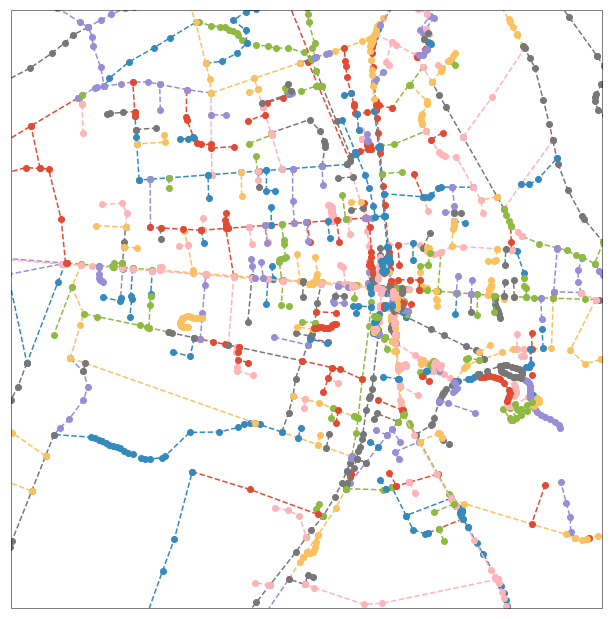

In [85]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
ax.set_extent((9.8457000, 9.8852000, 53.2732000, 53.29710005))
    
#ax.add_image(img, 12, interpolation = 'bicubic')

for street in streets:
    lats = []
    lons = []
    for (x, y) in street.line:
        lats.append(x)
        lons.append(y)
    
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree(), )